## Tensorflow

Created by the Google Brain team, TensorFlow is an open source library for numerical computation 
and large-scale machine learning

## Keras

Keras is an open-source neural-network library written in Python

In [36]:
import tensorflow as tf
import tensorflow.keras as ks
print(tf.__version__)
print(ks.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.1.0
2.2.4-tf


MNIST<br>
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of <br>
handwritten digits that is commonly used for training various image processing systems<br>

In [30]:
mnist = tf.keras.datasets.mnist

In [31]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()


In [32]:
print('X_train.shape :{}'.format(X_train.shape))
print('y_train.shape :{}'.format(X_train.shape))
print('X_test.shape :{}'.format(X_train.shape))

X_train.shape :(60000, 28, 28)
y_train.shape :(60000, 28, 28)
X_test.shape :(60000, 28, 28)


ip_nodes = 28*28 = 784<br>
op_nodes = 10(ten digits)

In [34]:
hidden_nodes = np.mean([784,10])
hidden_nodes

397.0

In [35]:
X_train[1][20]

array([  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
       178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

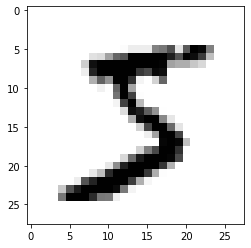

In [39]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

Normalizatio will make the NN easy to learn

In [40]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

In [41]:
X_train[1][20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13585002, 0.40275535, 0.39796064, 0.23334238,
       0.0767153 , 0.04634883, 0.13585002, 0.28448592, 0.35960299,
       0.40435358, 0.35640652, 0.26690533, 0.08950119, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

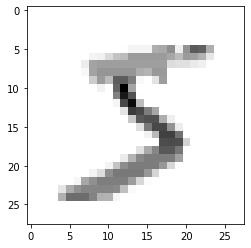

In [42]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
X_train[1].shape

(28, 28)

In [45]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Sequential - It is used to build models as a simple stack of layers. First, you instantiate your Sequential model<br>
object and then, you add layers to it one by one using the add() method.

In [48]:
model = tf.keras.models.Sequential()

In [49]:
model

In [50]:
# The input is multi dimensional 28*28 array, so lets flatten it
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(128, activation=tf.nn.relu))
model.add(ks.layers.Dense(10, activation=tf.nn.softmax))

In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(X_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2570 - accuracy: 0.9236
Epoch 2/3
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1040 - accuracy: 0.9677
Epoch 3/3
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0719 - accuracy: 0.9771


In [53]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0776 - accuracy: 0.9760
0.07758385767783038 0.976


In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred[0]

array([2.4480617e-08, 4.3179836e-07, 3.2179822e-05, 1.8521531e-04,
       4.4849209e-09, 8.3242018e-09, 6.7224390e-12, 9.9978131e-01,
       2.1794573e-08, 8.1769184e-07], dtype=float32)

In [92]:
y_pred[0].ndim

1

In [93]:
y_pred[1].shape

(10,)

In [95]:
np.argmax(y_pred[0])

7

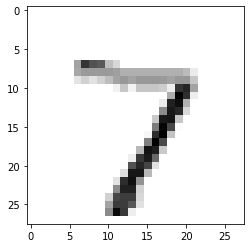

In [108]:
plt.imshow(X_test[0], cmap=plt.cm.binary)


In [97]:
model.save('HandDigitClassifier')

INFO:tensorflow:Assets written to: HandDigitClassifier\assets


In [98]:
new_model = tf.keras.models.load_model('HandDigitClassifier')

In [102]:
y_predictions = new_model.predict(X_test)

In [105]:
y_predictions[1]

array([2.9206845e-07, 3.7063721e-05, 9.9988782e-01, 1.0921881e-05,
       1.8263566e-09, 1.4448477e-08, 3.2510563e-08, 5.7089173e-06,
       5.8202360e-05, 7.2508291e-11], dtype=float32)

In [107]:
np.argmax(y_predictions[1])

2

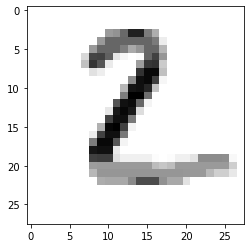

In [109]:
plt.imshow(X_test[1], cmap=plt.cm.binary)
